## Set up Colab environment

In [1]:
!git clone https://github.com/hayakzan/VAE_experiment

Cloning into 'VAE_experiment'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 240 (delta 38), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (240/240), 105.33 MiB | 17.63 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [2]:
cd VAE_experiment

/content/VAE_experiment


In [3]:
!unzip dataset.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: dataset/line-004212.png  
  inflating: dataset/line-000074.png  
  inflating: dataset/line-000060.png  
  inflating: dataset/line-002677.png  
  inflating: dataset/line-004206.png  
  inflating: dataset/line-003569.png  
  inflating: dataset/line-004560.png  
  inflating: dataset/line-002111.png  
  inflating: dataset/line-001418.png  
  inflating: dataset/line-000706.png  
  inflating: dataset/line-003227.png  
  inflating: dataset/line-004548.png  
  inflating: dataset/line-002139.png  
  inflating: dataset/line-001430.png  
  inflating: dataset/line-000048.png  
  inflating: dataset/line-001356.png  
  inflating: dataset/line-002887.png  
  inflating: dataset/line-003541.png  
  inflating: dataset/line-002893.png  
  inflating: dataset/line-003555.png  
  inflating: dataset/line-001342.png  
  inflating: dataset/line-001424.png  
  inflating: dataset/line-003233.png  
  inflating: dataset/line

In [4]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Train VAE on graphs

In [7]:
import numpy as np
from tensorflow.keras.models import load_model

from ml.utils import load_gestures, load_model, generate_morph_images, plot_reconstructed_images ##guessing morph_images is generate_morph_images
from ml.variational_autoencoder import VariationalAutoencoder

In [8]:
gesture_dict = load_gestures(size=64)
gestures = np.array(list(gesture_dict.values()))

In [12]:
encoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 1},
]

decoder_params = [
    {"filters": 64, "kernel_size": 3, "strides": 1},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 64, "kernel_size": 3, "strides": 2},
    {"filters": 32, "kernel_size": 3, "strides": 2},
    {"filters": 3, "kernel_size": 3, "strides": 1},
]

vae = VariationalAutoencoder(
    input_dim = (64, 64, 3),
    latent_dim = 200,
    encoder_params=encoder_params,
    decoder_params=decoder_params,
)

vae.save()

##weights will be saved and updated during the training
vae.save("/content/gdrive/My Drive/pkl")

In [13]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32

In [14]:
vae.compile_model(lr=LEARNING_RATE, r_loss_factor=10000)

In [15]:
vae.train(
    gestures,
    batch_size=BATCH_SIZE,
    epochs=3000
)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 1751/3000
4992/5000 [============================>.] - ETA: 0s - loss: 66.7254 - vae_r_loss: 14.2896 - vae_kl_loss: 52.4358
Epoch 01751: saving model to /content/gdrive/My Drive/weights.h5
5000/5000 [==============================] - 8s 2ms/sample - loss: 66.7170 - vae_r_loss: 14.2839 - vae_kl_loss: 52.4331
Epoch 1752/3000
4992/5000 [============================>.] - ETA: 0s - loss: 66.5091 - vae_r_loss: 14.1170 - vae_kl_loss: 52.3920
Epoch 01752: saving model to /content/gdrive/My Drive/weights.h5
5000/5000 [==============================] - 9s 2ms/sample - loss: 66.5045 - vae_r_loss: 14.1140 - vae_kl_loss: 52.3905
Epoch 1753/3000
5000/5000 [==============================] - ETA: 0s - loss: 66.5088 - vae_r_loss: 14.3873 - vae_kl_loss: 52.1215
Epoch 01753: saving model to /content/gdrive/My Drive/weights.h5
5000/5000 [==============================] - 9s 2ms/sample - loss: 66.5088 - vae_r_loss: 14.3873 

## Do the fun stuff with the VAE

In [6]:
import numpy as np
from ml.utils import (
    animate_morph_images,
    load_gestures,
    load_model,
    plot_morph_images,
    plot_random_gestures,
    plot_reconstructed_images,
)

vae = load_model(path='trained_model') #ok this is solved...

gesture_dict = load_gestures(size=64)
filenames, gestures = zip(*gesture_dict.items())
gestures = np.array(list(gestures))

common_kwargs = {
    'encoder': vae.encoder_model,
    'decoder': vae.decoder_model,
}

### Reconstruct faces

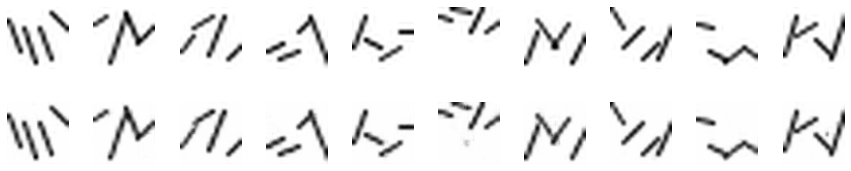

In [7]:
plot_reconstructed_images(data=gestures, **common_kwargs)

### Generate new faces

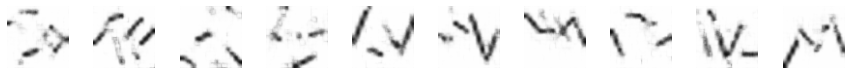

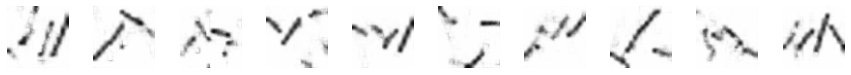

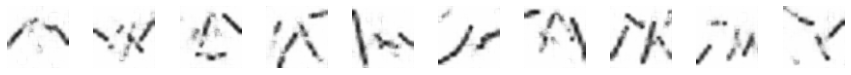

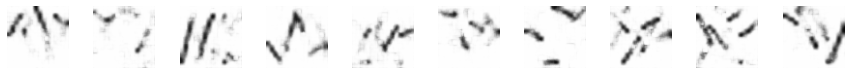

In [8]:
plot_random_gestures(vae.decoder_model)
plot_random_gestures(vae.decoder_model)
plot_random_gestures(vae.decoder_model)
plot_random_gestures(vae.decoder_model)

### Do face morphs

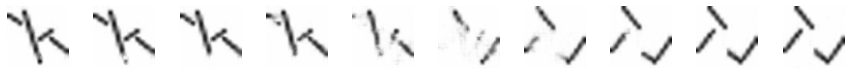

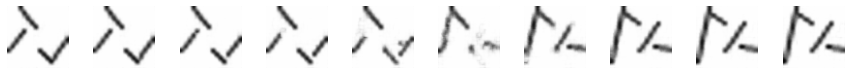

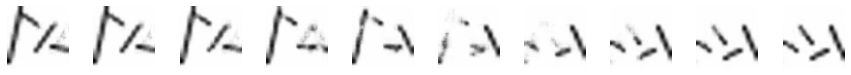

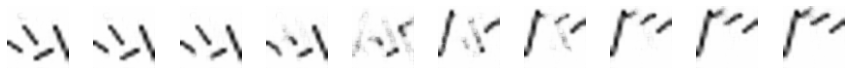

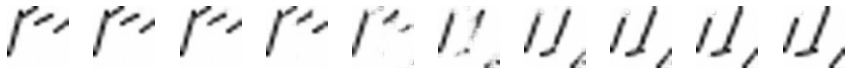

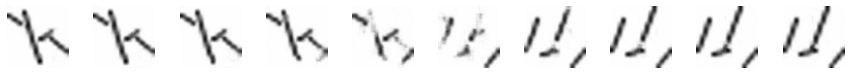

In [10]:
pairs = [
    ('line-000001.png', 'line-000002.png'),
    ('line-000002.png', 'line-000003.png'),
    ('line-000003.png', 'line-000004.png'),
    ('line-000004.png', 'line-000005.png'),
    ('line-000005.png', 'line-000006.png'),
    ('line-000001.png', 'line-000006.png'),

]

for f1, f2 in pairs:
    plot_morph_images(
        gesture_dict[f1], 
        gesture_dict[f2],
        **common_kwargs,
    )